In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# sklearn: data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# sklearn: train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

# sklearn classifiers

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import datasets, ensemble, model_selection
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

In [80]:
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
#Loading training and test data and concatanate


training_data = pd.read_csv('UNSW_NB15_training-set.csv')
testing_data = pd.read_csv('UNSW_NB15_testing-set.csv')

In [6]:
training_data

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0            1  0.121478   tcp       -   FIN      6      4     258     172   
1            2  0.649902   tcp       -   FIN     14     38     734   42014   
2            3  1.623129   tcp       -   FIN      8     16     364   13186   
3            4  1.681642   tcp     ftp   FIN     12     12     628     770   
4            5  0.449454   tcp       -   FIN     10      6     534     268   
...        ...       ...   ...     ...   ...    ...    ...     ...     ...   
175336  175337  0.000009   udp     dns   INT      2      0     114       0   
175337  175338  0.505762   tcp       -   FIN     10      8     620     354   
175338  175339  0.000009   udp     dns   INT      2      0     114       0   
175339  175340  0.000009   udp     dns   INT      2      0     114       0   
175340  175341  0.000009   udp     dns   INT      2      0     114       0   

                 rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0           74.087490  ...                 1               1             0   
1           78.473372  ...                 1               2             0   
2           14.170161  ...                 1               3             0   
3           13.677108  ...                 1               3             1   
4           33.373826  ...                 1              40             0   
...               ...  ...               ...             ...           ...   
175336  111111.107200  ...                13              24             0   
175337      33.612649  ...                 1               2             0   
175338  111111.107200  ...                 3              13             0   
175339  111111.107200  ...                14              30             0   
175340  111111.107200  ...                16              30             0   

        ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0                0                 0           1           1                0   
1                0                 0           1           6                0   
2                0                 0           2           6                0   
3                1                 0           2           1                0   
4                0                 0           2          39                0   
...            ...               ...         ...         ...              ...   
175336           0                 0          24          24                0   
175337           0                 0           1           1                0   
175338           0                 0           3          12                0   
175339           0                 0          30          30                0   
175340           0                 0          30          30                0   

        attack_cat  label  
0           Normal      0  
1           Normal      0  
2           Normal      0  
3           Normal      0  
4           Normal      0  
...            ...    ...  
175336     Generic      1  
175337   Shellcode      1  
175338     Generic      1  
175339     Generic      1  
175340     Generic      1  

[175341 rows x 45 columns]

In [7]:
testing_data

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0          1  0.000011   udp       -   INT      2      0     496       0   
1          2  0.000008   udp       -   INT      2      0    1762       0   
2          3  0.000005   udp       -   INT      2      0    1068       0   
3          4  0.000006   udp       -   INT      2      0     900       0   
4          5  0.000010   udp       -   INT      2      0    2126       0   
...      ...       ...   ...     ...   ...    ...    ...     ...     ...   
82327  82328  0.000005   udp       -   INT      2      0     104       0   
82328  82329  1.106101   tcp       -   FIN     20      8   18062     354   
82329  82330  0.000000   arp       -   INT      1      0      46       0   
82330  82331  0.000000   arp       -   INT      1      0      46       0   
82331  82332  0.000009   udp       -   INT      2      0     104       0   

                rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0       90909.090200  ...                 1               2             0   
1      125000.000300  ...                 1               2             0   
2      200000.005100  ...                 1               3             0   
3      166666.660800  ...                 1               3             0   
4      100000.002500  ...                 1               3             0   
...              ...  ...               ...             ...           ...   
82327  200000.005100  ...                 1               2             0   
82328      24.410067  ...                 1               1             0   
82329       0.000000  ...                 1               1             0   
82330       0.000000  ...                 1               1             0   
82331  111111.107200  ...                 1               1             0   

       ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0               0                 0           1           2                0   
1               0                 0           1           2                0   
2               0                 0           1           3                0   
3               0                 0           2           3                0   
4               0                 0           2           3                0   
...           ...               ...         ...         ...              ...   
82327           0                 0           2           1                0   
82328           0                 0           3           2                0   
82329           0                 0           1           1                1   
82330           0                 0           1           1                1   
82331           0                 0           1           1                0   

       attack_cat  label  
0          Normal      0  
1          Normal      0  
2          Normal      0  
3          Normal      0  
4          Normal      0  
...           ...    ...  
82327      Normal      0  
82328      Normal      0  
82329      Normal      0  
82330      Normal      0  
82331      Normal      0  

[82332 rows x 45 columns]

In [8]:
concatenated_data = pd.concat([training_data, testing_data])

In [9]:
concatenated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sin

In [10]:
unique_categories = concatenated_data['attack_cat'].unique()

unique_categories

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [11]:
unique_labels = concatenated_data['label'].unique()

unique_labels

array([0, 1])

In [12]:
concatenated_data.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [13]:
useful_data = concatenated_data.dropna()

In [14]:
useful_data.shape

(257673, 45)

<AxesSubplot:>

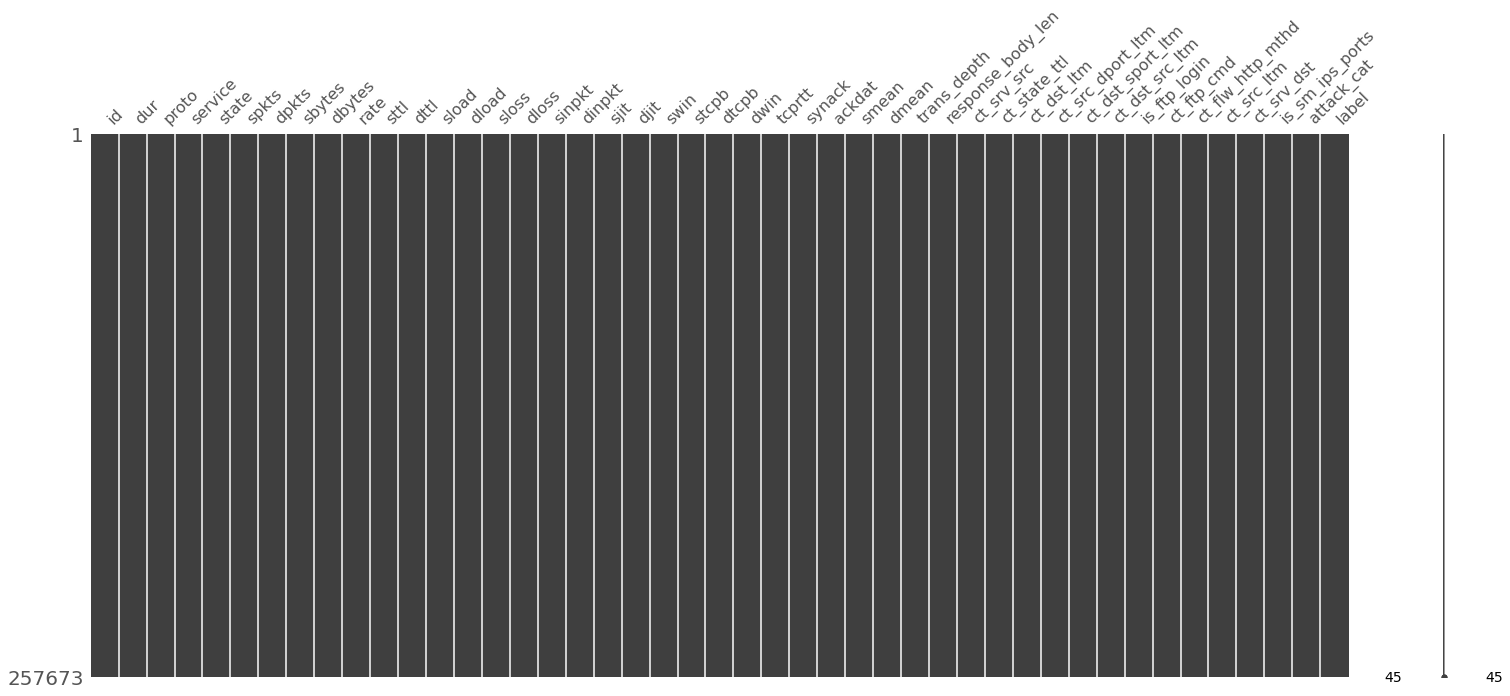

In [15]:
import missingno
import pickle

missingno.matrix(useful_data)

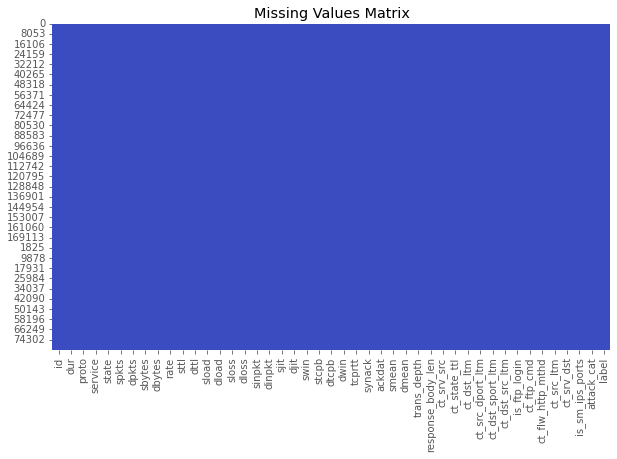

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(useful_data.isnull(), cbar=False, cmap='coolwarm')
plt.title('Missing Values Matrix')
plt.show()

In [17]:
useful_data.describe(include="all")

id            dur   proto service   state          spkts  \
count   257673.000000  257673.000000  257673  257673  257673  257673.000000   
unique            NaN            NaN     133      13      11            NaN   
top               NaN            NaN     tcp       -     FIN            NaN   
freq              NaN            NaN  123041  141321  117164            NaN   
mean     72811.823858       1.246715     NaN     NaN     NaN      19.777144   
std      48929.917641       5.974305     NaN     NaN     NaN     135.947152   
min          1.000000       0.000000     NaN     NaN     NaN       1.000000   
25%      32210.000000       0.000008     NaN     NaN     NaN       2.000000   
50%      64419.000000       0.004285     NaN     NaN     NaN       4.000000   
75%     110923.000000       0.685777     NaN     NaN     NaN      12.000000   
max     175341.000000      59.999989     NaN     NaN     NaN   10646.000000   

                dpkts        sbytes        dbytes          rate  ...  \
count   257673.000000  2.576730e+05  2.576730e+05  2.576730e+05  ...   
unique            NaN           NaN           NaN           NaN  ...   
top               NaN           NaN           NaN           NaN  ...   
freq              NaN           NaN           NaN           NaN  ...   
mean        18.514703  8.572952e+03  1.438729e+04  9.125391e+04  ...   
std        111.985965  1.737739e+05  1.461993e+05  1.603446e+05  ...   
min          0.000000  2.400000e+01  0.000000e+00  0.000000e+00  ...   
25%          0.000000  1.140000e+02  0.000000e+00  3.078928e+01  ...   
50%          2.000000  5.280000e+02  1.780000e+02  2.955665e+03  ...   
75%         10.000000  1.362000e+03  1.064000e+03  1.250000e+05  ...   
max      11018.000000  1.435577e+07  1.465753e+07  1.000000e+06  ...   

        ct_dst_sport_ltm  ct_dst_src_ltm   is_ftp_login     ct_ftp_cmd  \
count      257673.000000   257673.000000  257673.000000  257673.000000   
unique               NaN             NaN            NaN            NaN   
top                  NaN             NaN            NaN            NaN   
freq                 NaN             NaN            NaN            NaN   
mean            4.032677        8.322964       0.012819       0.012850   
std             5.831515       11.120754       0.116091       0.116421   
min             1.000000        1.000000       0.000000       0.000000   
25%             1.000000        1.000000       0.000000       0.000000   
50%             1.000000        3.000000       0.000000       0.000000   
75%             3.000000        8.000000       0.000000       0.000000   
max            46.000000       65.000000       4.000000       4.000000   

        ct_flw_http_mthd     ct_src_ltm     ct_srv_dst  is_sm_ips_ports  \
count      257673.000000  257673.000000  257673.000000    257673.000000   
unique               NaN            NaN            NaN              NaN   
top                  NaN            NaN            NaN              NaN   
freq                 NaN            NaN            NaN              NaN   
mean            0.132005       6.800045       9.121049         0.014274   
std             0.681854       8.396266      10.874752         0.118618   
min             0.000000       1.000000       1.000000         0.000000   
25%             0.000000       2.000000       2.000000         0.000000   
50%             0.000000       3.000000       4.000000         0.000000   
75%             0.000000       8.000000      11.000000         0.000000   
max            30.000000      60.000000      62.000000         1.000000   

        attack_cat          label  
count       257673  257673.000000  
unique          10            NaN  
top         Normal            NaN  
freq         93000            NaN  
mean           NaN       0.639077  
std            NaN       0.480269  
min            NaN       0.000000  
25%            NaN       0.000000  
50%            NaN       1.000000  
75%            NaN       1.000000  
max            NaN 

<AxesSubplot:>

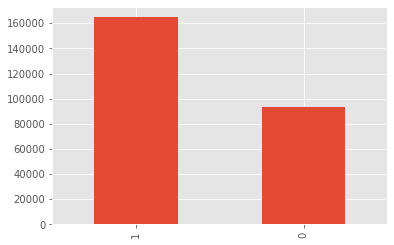

In [18]:
useful_data['label'].value_counts().plot.bar()

<AxesSubplot:>

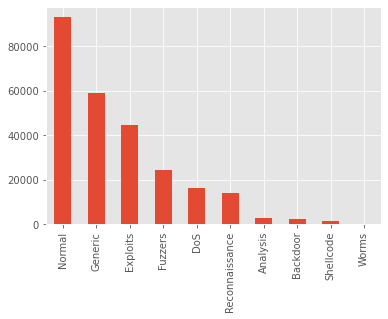

In [19]:
useful_data['attack_cat'].value_counts().plot.bar()

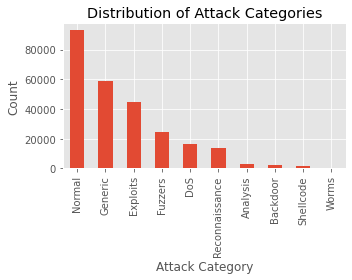

In [20]:
plt.figure(figsize=(5, 4))
useful_data['attack_cat'].value_counts().plot.bar()
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.title('Distribution of Attack Categories')
plt.tight_layout()
plt.show()

In [21]:
useful_data['label'].value_counts(normalize=True)

1    0.639077
0    0.360923
Name: label, dtype: float64

## Let's dig deeper into data imbalance

In [22]:
labels = useful_data['label']
attacks = useful_data['attack_cat']

In [23]:
def AttackLabel_ratio(input):
    
    #Calculate ratio
    
    unique, count = np.unique(input, return_counts=True)
    ratio = round(count[0]/count[1], 1)
    return f'{ratio}:1 ({count[0]}/{count[1]})'

Distributions of labels: 0.6:1 (93000/164673)


/Users/mdtohidulislam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


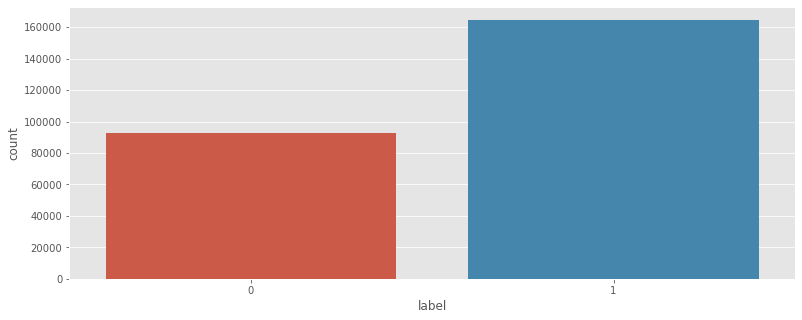

In [24]:
print('Distributions of labels:', AttackLabel_ratio(labels))
plt.figure(figsize=(13,5))
sns.countplot(labels,label="Sum")
plt.show()

Distribution of attack types: 1.1:1 (2677/2329)


/Users/mdtohidulislam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


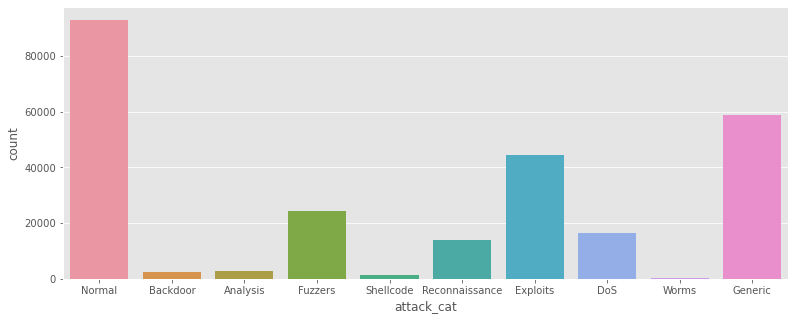

In [25]:
print('Distribution of attack types:', AttackLabel_ratio(attacks))
plt.figure(figsize=(13,5))
sns.countplot(attacks,label="Sum")
plt.show()

## Encoding categorical features Encoding categorical features using LabelEncoder.

In [26]:
# Select categorical columns
categorical_columns = useful_data.select_dtypes(include=['object']).columns
# Encode categorical features with LabelEncoder
encoding = LabelEncoder()
useful_data[categorical_columns] = useful_data[categorical_columns].apply(encoding.fit_transform)

In [27]:
useful_data.head()

id       dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
0   1  0.121478    113        0      4      6      4     258     172   
1   2  0.649902    113        0      4     14     38     734   42014   
2   3  1.623129    113        0      4      8     16     364   13186   
3   4  1.681642    113        3      4     12     12     628     770   
4   5  0.449454    113        0      4     10      6     534     268   

        rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  74.087490  ...                 1               1             0           0   
1  78.473372  ...                 1               2             0           0   
2  14.170161  ...                 1               3             0           0   
3  13.677108  ...                 1               3             1           1   
4  33.373826  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0           1           1                0           6   
1                 0           1           6                0           6   
2                 0           2           6                0           6   
3                 0           2           1                0           6   
4                 0           2          39                0           6   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 45 columns]


## Data Correlation.


## We will REMOVE highly correlated features.

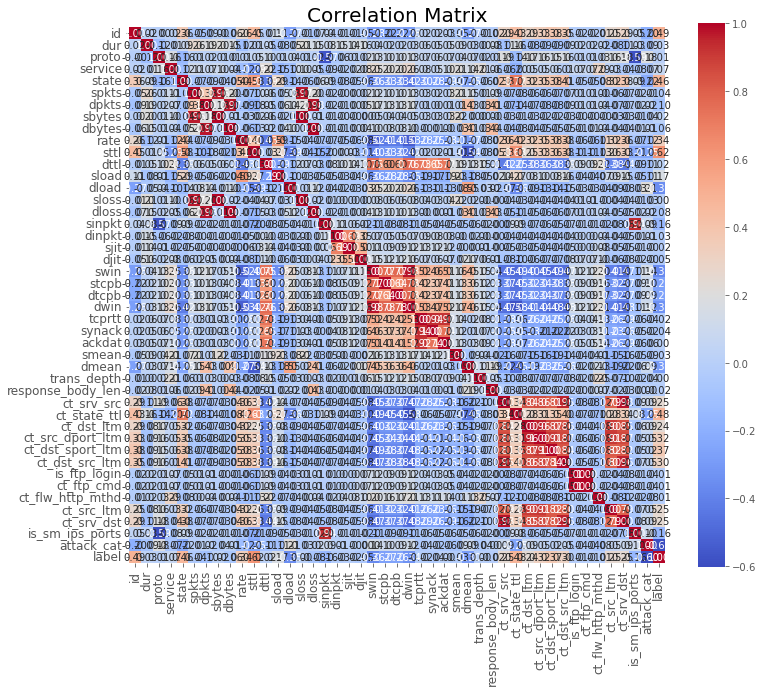

NameError: name 'fig' is not defined

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(useful_data.corr(), cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

fig.savefig('Features with Corelation.png')

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(useful_data.corr(), cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

fig = plt.gcf()
fig.savefig('Features with Corelation.png', dpi=300)

In [29]:
corr_matrix = useful_data.corr().abs()
correlated_vars = corr_matrix[corr_matrix > 0.98].stack().reset_index()
correlated_vars = correlated_vars[correlated_vars['level_0'] < correlated_vars['level_1']]
correlated_vars.columns = ['Var1', 'Var2', 'Corr']
correlated_vars = correlated_vars.sort_values(by='Corr', ascending=False)
print(correlated_vars)

          Var1          Var2      Corr
45  ct_ftp_cmd  is_ftp_login  0.998855
10      dbytes         dloss  0.996711
8       sbytes         sloss  0.995772
28        dwin          swin  0.980458


## Computing the correlation matrix for the DataFrame useful_data and take the absolute values of its elements. Stack the correlation matrix to create a "long" DataFrame that contains one row for each pair of variables with a correlation coefficient greater than 0.98. Remove rows where the first variable is equal to or greater than the second variable to eliminate duplicates. Rename the columns of the long DataFrame to make them more descriptive. Sort the long DataFrame by the correlation coefficient in descending order. Print the long DataFrame.

In [30]:
corr_matrix = useful_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.98)]
useful_data = useful_data.drop(columns=to_drop)

In [31]:
useful_data

id       dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
0          1  0.121478    113        0      4      6      4     258     172   
1          2  0.649902    113        0      4     14     38     734   42014   
2          3  1.623129    113        0      4      8     16     364   13186   
3          4  1.681642    113        3      4     12     12     628     770   
4          5  0.449454    113        0      4     10      6     534     268   
...      ...       ...    ...      ...    ...    ...    ...     ...     ...   
82327  82328  0.000005    119        0      5      2      0     104       0   
82328  82329  1.106101    113        0      4     20      8   18062     354   
82329  82330  0.000000      6        0      5      1      0      46       0   
82330  82331  0.000000      6        0      5      1      0      46       0   
82331  82332  0.000009    119        0      5      2      0     104       0   

                rate  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0          74.087490  ...                 1                 1               1   
1          78.473372  ...                 1                 1               2   
2          14.170161  ...                 1                 1               3   
3          13.677108  ...                 1                 1               3   
4          33.373826  ...                 2                 1              40   
...              ...  ...               ...               ...             ...   
82327  200000.005100  ...                 1                 1               2   
82328      24.410067  ...                 1                 1               1   
82329       0.000000  ...                 1                 1               1   
82330       0.000000  ...                 1                 1               1   
82331  111111.107200  ...                 1                 1               1   

       is_ftp_login  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
0                 0                 0           1           1   
1                 0                 0           1           6   
2                 0                 0           2           6   
3                 1                 0           2           1   
4                 0                 0           2          39   
...             ...               ...         ...         ...   
82327             0                 0           2           1   
82328             0                 0           3           2   
82329             0                 0           1           1   
82330             0                 0           1           1   
82331             0                 0           1           1   

       is_sm_ips_ports  attack_cat  label  
0                    0           6      0  
1                    0           6      0  
2                    0           6      0  
3                    0           6      0  
4                    0           6      0  
...                ...         ...    ...  
82327                0           6      0  
82328                0           6      0  
82329                1           6      0  
82330                1           6      0  
82331                0           6      0  

[257673 rows x 41 columns]

In [32]:
useful_data = useful_data.drop(axis=1, columns=['id','attack_cat'])

In [33]:
useful_data

dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
0      0.121478    113        0      4      6      4     258     172   
1      0.649902    113        0      4     14     38     734   42014   
2      1.623129    113        0      4      8     16     364   13186   
3      1.681642    113        3      4     12     12     628     770   
4      0.449454    113        0      4     10      6     534     268   
...         ...    ...      ...    ...    ...    ...     ...     ...   
82327  0.000005    119        0      5      2      0     104       0   
82328  1.106101    113        0      4     20      8   18062     354   
82329  0.000000      6        0      5      1      0      46       0   
82330  0.000000      6        0      5      1      0      46       0   
82331  0.000009    119        0      5      2      0     104       0   

                rate  sttl  ...  ct_dst_ltm  ct_src_dport_ltm  \
0          74.087490   252  ...           1                 1   
1          78.473372    62  ...           1                 1   
2          14.170161    62  ...           2                 1   
3          13.677108    62  ...           2                 1   
4          33.373826   254  ...           2                 2   
...              ...   ...  ...         ...               ...   
82327  200000.005100   254  ...           2                 1   
82328      24.410067   254  ...           2                 1   
82329       0.000000     0  ...           1                 1   
82330       0.000000     0  ...           1                 1   
82331  111111.107200   254  ...           1                 1   

       ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_flw_http_mthd  \
0                     1               1             0                 0   
1                     1               2             0                 0   
2                     1               3             0                 0   
3                     1               3             1                 0   
4                     1              40             0                 0   
...                 ...             ...           ...               ...   
82327                 1               2             0                 0   
82328                 1               1             0                 0   
82329                 1               1             0                 0   
82330                 1               1             0                 0   
82331                 1               1             0                 0   

       ct_src_ltm  ct_srv_dst  is_sm_ips_ports  label  
0               1           1                0      0  
1               1           6                0      0  
2               2           6                0      0  
3               2           1                0      0  
4               2          39                0      0  
...           ...         ...              ...    ...  
82327           2           1                0      0  
82328           3           2                0      0  
82329           1           1                1      0  
82330           1           1                1      0  
82331           1           1                0      0  

[257673 rows x 39 columns]

## Selecting target and determining the appropriate features.

In [34]:
X = useful_data.drop(columns=['label'])
feature_list = list(X.columns)

In [35]:
print(len(feature_list))
feature_list

38


['dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports']

In [36]:
y = useful_data['label']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [38]:
print("Training set:", len(X_train))
print("Testing set:", len(X_test))

Training set: 180371
Testing set: 77302


In [39]:
standardrize_feature = StandardScaler().fit(X_train)
X_train = standardrize_feature.transform(X_train)
X_test = standardrize_feature.transform(X_test)

## Decision Tree Classifier

In [45]:
model1 = DecisionTreeClassifier()

In [47]:
model1.fit(X_train, y_train)

DecisionTreeClassifier()

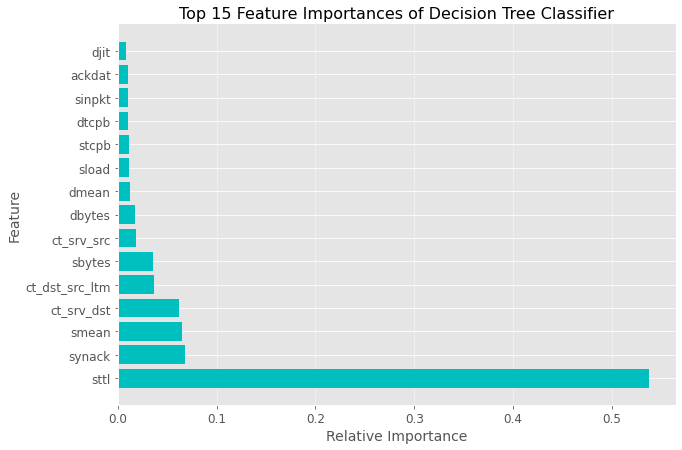

In [49]:
importances = model1.feature_importances_
indicators = np.argsort(importances)[::-1]
features = np.array(feature_list)
n = 15  # top n importance

# set the figure size
plt.figure(figsize=(10, 7))

# set the title and adjust the font size
plt.title(f'Top {n} Feature Importances of Decision Tree Classifier', fontsize=16)

# create the horizontal bar plot
plt.barh(range(n), importances[indicators][:n], color='c', align='center')

# customize the y-axis ticks and labels
plt.yticks(range(n), features[indicators][:n], fontsize=12)
plt.ylabel('Feature', fontsize=14)

# customize the x-axis ticks and labels
plt.xticks(fontsize=12)
plt.xlabel('Relative Importance', fontsize=14)

# remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# add a grid and customize its appearance
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)

# show the plot
plt.show()

In [50]:
model1.feature_importances_

array([7.74981734e-03, 1.76593385e-03, 2.51479675e-03, 4.77220324e-04,
       5.77240316e-03, 2.82853716e-03, 3.56318535e-02, 1.73986377e-02,
       7.07189225e-03, 5.37418799e-01, 2.36147177e-05, 1.15240515e-02,
       8.23859463e-03, 1.02814506e-02, 5.93704540e-03, 5.78329370e-03,
       8.59139938e-03, 1.30475522e-03, 1.13474811e-02, 1.09152860e-02,
       7.92698973e-03, 6.76950538e-02, 1.01693084e-02, 6.46976785e-02,
       1.23342168e-02, 6.44491275e-04, 2.89462020e-03, 1.82912997e-02,
       1.76017636e-04, 5.44116896e-03, 3.63835069e-03, 3.44592467e-03,
       3.67360756e-02, 1.46449142e-04, 4.37502957e-03, 7.24006837e-03,
       6.15703936e-02, 0.00000000e+00])

In [51]:
from tabulate import tabulate

Metric                 Value
--------------  ------------
Training score      0.99786
Accuracy            0.935539
Precision           0.950992
Recall              0.94781
Support         49320


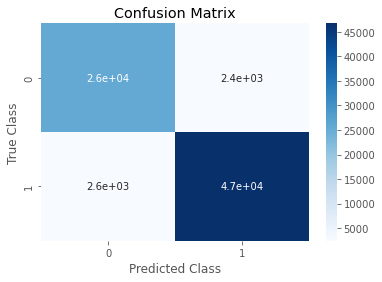

In [62]:
from sklearn.metrics import confusion_matrix

y_pred = model1.predict(X_test)
train_score = model1.score(X_train, y_train)
accuracy = model1.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
support = np.sum(confusion_matrix(y_test, y_pred), axis=1)
    
table_data = [["Training score", train_score],
              ["Accuracy", accuracy],
              ["Precision", precision],
              ["Recall", recall],
              ["Support", support[1]]]

table_header = ["Metric", "Value"]
print(tabulate(table_data, headers=table_header))

# plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

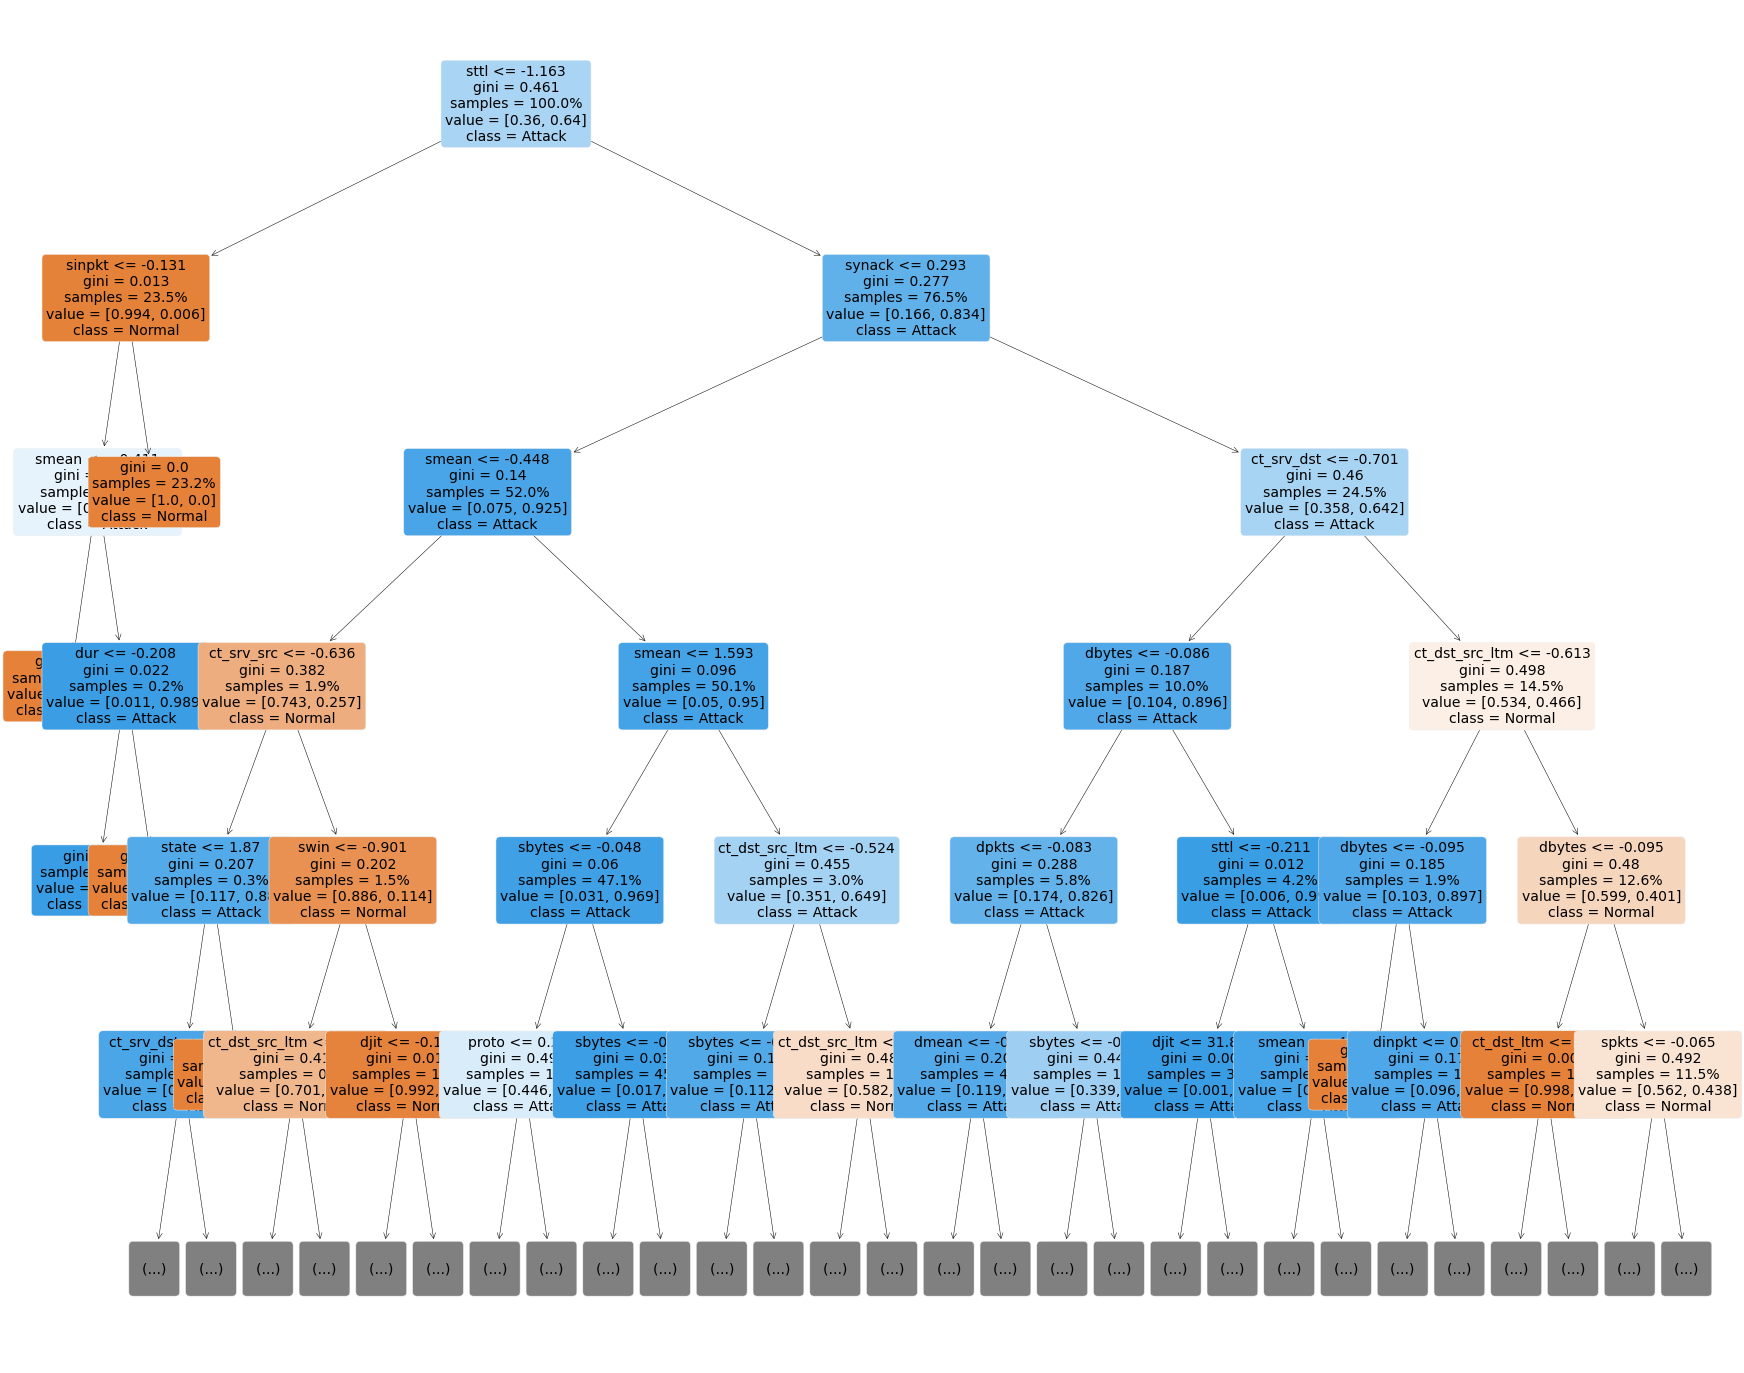

In [64]:
fig, ax = plt.subplots(figsize=(30, 25))
tree.plot_tree(model1, ax=ax, feature_names=feature_list, class_names=['Normal', 'Attack'], fontsize=14, proportion=True, filled=True, rounded=True, max_depth=5)
for o in ax.patches:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

fig.savefig('Decision Tree Classifier XAI Visualization.png')

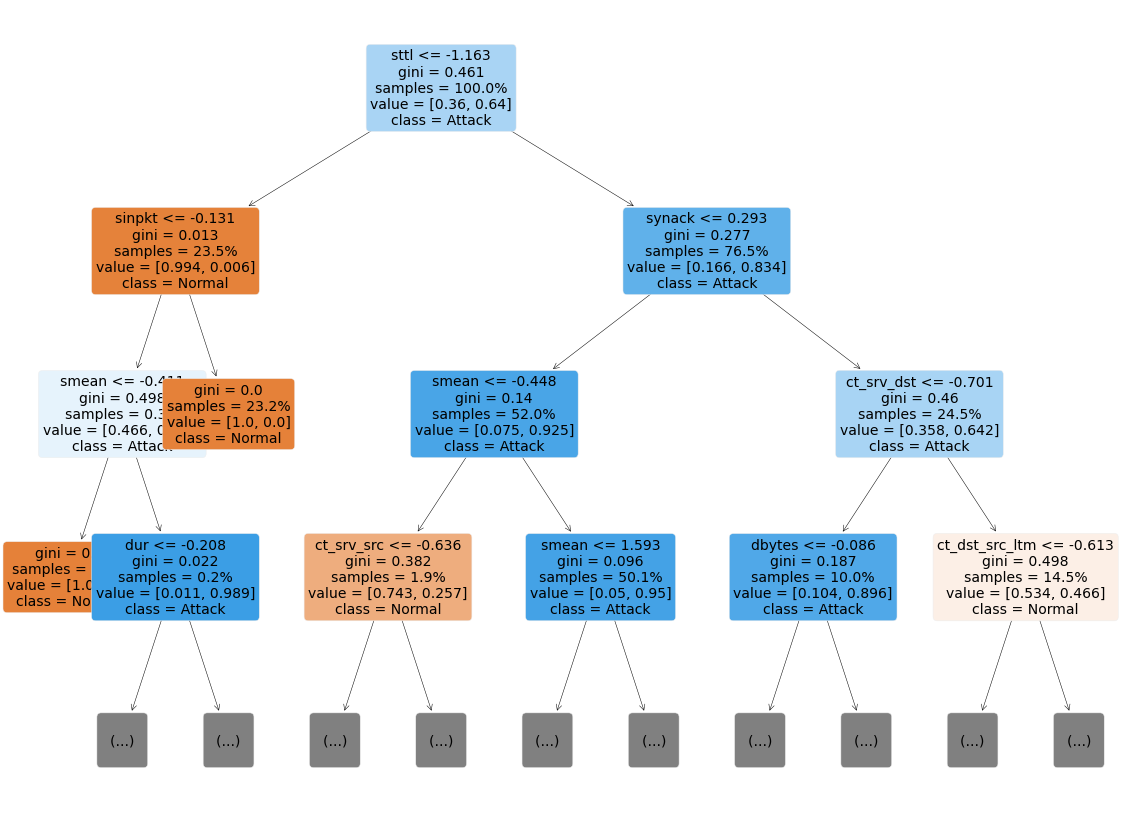

In [65]:
fig, ax = plt.subplots(figsize=(20, 15))
tree.plot_tree(model1, ax=ax, feature_names=feature_list, class_names=['Normal', 'Attack'], fontsize=14, proportion=True, filled=True, rounded=True, max_depth=3)
for o in ax.patches:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

fig.savefig('Decision Tree Classifier XAI Visualization with depth3.png')

## Random Forest Classifier + Recursive Feature Elimination

In [66]:
!pip install shap

In [67]:
model2 = 'Random Forest Classifier + Recursive Feature Elimination'
model2 = RandomForestClassifier()
model2 = RFE(model2)
start_time = time.time()
model2.fit(X_train, y_train)
training_time = time.time() - start_time

X_train_rfe = model2.transform(X_train)
X_test_rfe = model2.transform(X_test)

start_time = time.time()
model2.fit(X_train_rfe, y_train)
training_time = training_time + (time.time() - start_time)
    
y_pred = model2.predict(X_test_rfe)
    
train_score_RFRFE = model2.score(X_train_rfe, y_train)
accuracy_RFRFE = model2.score(X_test_rfe, y_test)
precision_RFRFE = precision_score(y_test, y_pred)
recall_RFRFE = recall_score(y_test, y_pred)

In [69]:
!pip install PrettyTable

In [70]:
from prettytable import PrettyTable

# create a table with column headers
table = PrettyTable(['Model', 'Training Time', 'Accuracy', 'Precision', 'Recall'])

# add a row for Random Forest Classifier + Recursive Feature Elimination
table.add_row([
    'Random Forest Classifier + Recursive Feature Elimination',
    training_time,
    accuracy_RFRFE,
    precision_RFRFE,
    recall_RFRFE
])

# print the table
print(table)

+----------------------------------------------------------+------------------+-------------------+-------------------+--------------------+
|                          Model                           |  Training Time   |      Accuracy     |     Precision     |       Recall       |
+----------------------------------------------------------+------------------+-------------------+-------------------+--------------------+
| Random Forest Classifier + Recursive Feature Elimination | 586.201639175415 | 0.940544875941114 | 0.953112335872913 | 0.9537307380373073 |
+----------------------------------------------------------+------------------+-------------------+-------------------+--------------------+


In [71]:
import shap

# Define the base estimator
base_estimator = RandomForestClassifier()

# Create an RFE object with the base estimator
model2 = RFE(base_estimator)

# Fit the RFE object on the training data
model2.fit(X_train, y_train)

# Get the selected features
X_train_rfe = model2.transform(X_train)
X_test_rfe = model2.transform(X_test)

# Get the underlying estimator object
estimator = model2.estimator_

# Create an explainer object with the trained model and training data
explainer = shap.Explainer(estimator, X_train_rfe)

# Compute SHAP values for test data
shap_values = explainer(X_test_rfe)

# Visualize the SHAP values for a single instance
shap.plots.waterfall(shap_values[0], max_display=10)

# Visualize the summary plot of SHAP values for all instances
shap.summary_plot(shap_values, X_test_rfe, plot_type='bar')


100%|===================| 154597/154604 [119:21<00:00]        

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.239800, while the model output was 0.560000. If this difference is acceptable you can set check_additivity=False to disable this check.

## Random Forest Classifier

In [40]:
model3 = RandomForestClassifier()

In [41]:
model3.fit(X_train, y_train)

RandomForestClassifier()

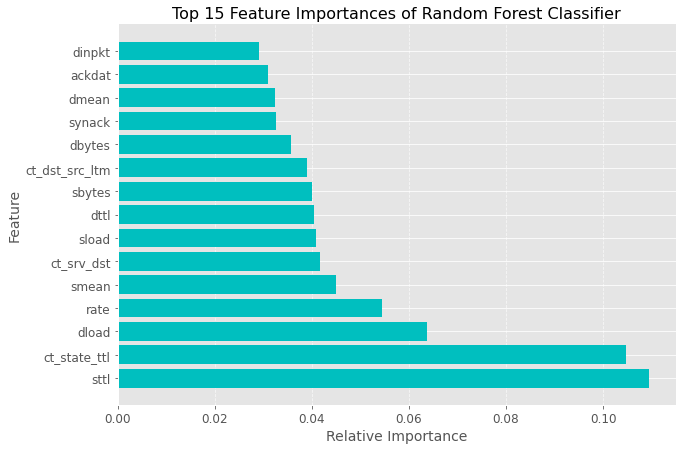

In [42]:
importances = model3.feature_importances_
indicators = np.argsort(importances)[::-1]
features = np.array(feature_list)
n = 15  # top n importance

# set the figure size
plt.figure(figsize=(10, 7))

# set the title and adjust the font size
plt.title(f'Top {n} Feature Importances of Random Forest Classifier', fontsize=16)

# create the horizontal bar plot
plt.barh(range(n), importances[indicators][:n], color='c', align='center')

# customize the y-axis ticks and labels
plt.yticks(range(n), features[indicators][:n], fontsize=12)
plt.ylabel('Feature', fontsize=14)

# customize the x-axis ticks and labels
plt.xticks(fontsize=12)
plt.xlabel('Relative Importance', fontsize=14)

# remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# add a grid and customize its appearance
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)

# show the plot
plt.show()

In [43]:
model3.feature_importances_

array([0.01989695, 0.00758435, 0.00761069, 0.01926815, 0.01127132,
       0.01807769, 0.04011672, 0.0357721 , 0.05439071, 0.10947094,
       0.04039742, 0.04082419, 0.06380281, 0.02447154, 0.0291401 ,
       0.01393547, 0.01563894, 0.01157916, 0.00889538, 0.00817665,
       0.01458048, 0.03250622, 0.03094287, 0.04499322, 0.03237582,
       0.00183957, 0.00320391, 0.02556093, 0.1047318 , 0.00804283,
       0.00638783, 0.01922997, 0.03894349, 0.00029523, 0.00219517,
       0.00833197, 0.04177469, 0.00374274])

In [44]:
from tabulate import tabulate

Metric                 Value
--------------  ------------
Training score      0.997799
Accuracy            0.950325
Precision           0.964036
Recall              0.957943
Support         49361


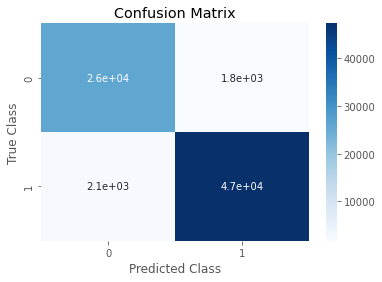

In [46]:
from sklearn.metrics import confusion_matrix

y_pred = model3.predict(X_test)
train_score = model3.score(X_train, y_train)
accuracy = model3.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
support = np.sum(confusion_matrix(y_test, y_pred), axis=1)
    
table_data = [["Training score", train_score],
              ["Accuracy", accuracy],
              ["Precision", precision],
              ["Recall", recall],
              ["Support", support[1]]]

table_header = ["Metric", "Value"]
print(tabulate(table_data, headers=table_header))

# plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [48]:
!pip install shap

     |████████████████████████████████| 17.0 MB 749 kB/s eta 0:00:01    |██████████████▌                 | 7.7 MB 1.6 MB/s eta 0:00:06
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.21.6 which is incompatible.
streamlit 1.11.1 requires protobuf<4,>=3.12, but you have protobuf 4.23.0 which is incompatible.


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train the random forest model
model3 = RandomForestClassifier(n_estimators=5, random_state=1)
model3.fit(X_train, y_train)

# Extract the decision trees for each estimator in the forest
estimators = model3.estimators_

# Visualize each decision tree using plot_tree
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(50, 50), dpi=200)

for i, estimator in enumerate(estimators):
    ax = axes.flatten()[i]
    plot_tree(estimator, ax=ax, filled=True, feature_names=feature_list, class_names=['Normal', 'Attack'])
    ax.set_title(f"Tree {i+1}")

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [1]:
model3 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model3.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

NameError: name 'keras' is not defined

In [63]:
!pip install xgboost

     |████████████████████████████████| 1.8 MB 1.3 MB/s eta 0:00:01


## Gradient Boosting Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
pip install numba==0.53.1


     |████████████████████████████████| 2.2 MB 79 kB/s eta 0:00:016
     |████████████████████████████████| 18.5 MB 60 kB/s eta 0:00:014
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.0
    Uninstalling llvmlite-0.38.0:
      Successfully uninstalled llvmlite-0.38.0
  Attempting uninstall: numba
    Found existing installation: numba 0.55.1
    Uninstalling numba-0.55.1:
      Successfully uninstalled numba-0.55.1
Note: you may need to restart the kernel to use updated packages.


In [68]:
import xgboost as xgb
import shap
import numpy as np

In [69]:
# Convert data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set hyperparameters for the model
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss"
}

# Train the model
model4 = xgb.train(params, dtrain, num_boost_round=5000, evals=[(dtest, "test")],
                  verbose_eval=100, early_stopping_rounds=20)


[0]	test-logloss:0.64659
[100]	test-logloss:0.28671
[200]	test-logloss:0.19327
[300]	test-logloss:0.15803
[400]	test-logloss:0.14201
[500]	test-logloss:0.13325
[600]	test-logloss:0.12792
[700]	test-logloss:0.12444
[800]	test-logloss:0.12168
[900]	test-logloss:0.11957
[1000]	test-logloss:0.11786
[1100]	test-logloss:0.11651
[1200]	test-logloss:0.11550
[1300]	test-logloss:0.11456
[1400]	test-logloss:0.11381
[1500]	test-logloss:0.11312
[1600]	test-logloss:0.11251
[1700]	test-logloss:0.11199
[1800]	test-logloss:0.11150
[1900]	test-logloss:0.11104
[2000]	test-logloss:0.11062
[2100]	test-logloss:0.11030
[2200]	test-logloss:0.10997
[2300]	test-logloss:0.10969
[2400]	test-logloss:0.10940
[2500]	test-logloss:0.10911
[2600]	test-logloss:0.10884
[2700]	test-logloss:0.10858
[2800]	test-logloss:0.10835
[2900]	test-logloss:0.10813
[3000]	test-logloss:0.10796
[3100]	test-logloss:0.10777
[3200]	test-logloss:0.10761
[3300]	test-logloss:0.10745
[3400]	test-logloss:0.10729
[3500]	test-logloss:0.10711
[360

In [70]:
explainer = shap.TreeExplainer(model4)
shap_values_test = explainer.shap_values(X_test)

The following code generates a force plot using the SHAP (SHapley Additive exPlanations) library, which helps to interpret the output of machine learning models by providing the contribution of each feature to the final prediction of the model.

The first line shap.initjs() initializes the JavaScript visualization library used by SHAP.

The second line shap.force_plot(explainer.expected_value, shap_values_test[5,:], X_test.iloc[5,:]) generates the force plot. explainer.expected_value is the expected value of the model output, and shap_values_test[5,:] is the SHAP values for the prediction of the 5th row of the test set. X_test.iloc[5,:] is the actual feature values for the 5th row of the test set.

The force plot shows how each feature contributes to the final prediction of the model for the selected instance. The vertical axis represents the features, and the horizontal axis represents the SHAP values. The color of each feature bar represents the value of the feature for the selected instance, with red representing high values and blue representing low values. The length of each feature bar represents the contribution of that feature to the final prediction. Features with positive SHAP values contribute positively to the prediction, while features with negative SHAP values contribute negatively.

In [85]:
# Load SHAP JavaScript visualization
shap.initjs()

# Select a random test instance index for visualization
instance_idx = 5

# Create a DMatrix for the instance to explain
dtest_instance = xgb.DMatrix(X_test.iloc[instance_idx,:])

# Generate the SHAP values for the instance
shap_values_instance = explainer.shap_values(dtest_instance)[0]

# Generate a force plot to explain the prediction of the instance
force_plot = shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values_instance, 
    features=X_test.iloc[instance_idx,:],
    matplotlib=False, 
    show=False
)

# Save the plot to an HTML file
shap.save_html(f"shap_force_plot_instance_{instance_idx}.html", force_plot)


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [84]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_test[5,:], X_test.iloc[5,:])

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [83]:
import shap

# Load SHAP JavaScript visualization
shap.initjs()

# Select a random test instance index for visualization
instance_idx = 5

# Generate the SHAP values for the instance
shap_values_instance = explainer.shap_values(X_test)[instance_idx]

# Generate a force plot to explain the prediction of the instance
shap.force_plot(explainer.expected_value, shap_values_instance)

# Save the plot to an HTML file
shap.save_html(f"shap_force_plot_instance_{instance_idx}.html", force_plot)


In [86]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
import numpy as np
import matplotlib.pylab as pl

In [87]:
xg_train = xgboost.DMatrix(X_train, label=y_train)
xg_test = xgboost.DMatrix(X_test, label=y_test)

In [92]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss"
}
model5 = xgboost.train(params, xg_train, 500, evals = [(xg_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-logloss:0.64659
[100]	test-logloss:0.28671
[200]	test-logloss:0.19327
[300]	test-logloss:0.15803
[400]	test-logloss:0.14201
[499]	test-logloss:0.13333


In [93]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model5)
shap_values_test = explainer.shap_values(X_test)

In [95]:
# print the JS visualization code to the notebook
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_test[5,:], X_test[5,:])

In [97]:
shap.force_plot(explainer.expected_value, shap_values_test[:1000,:], X_test[:1000,:])

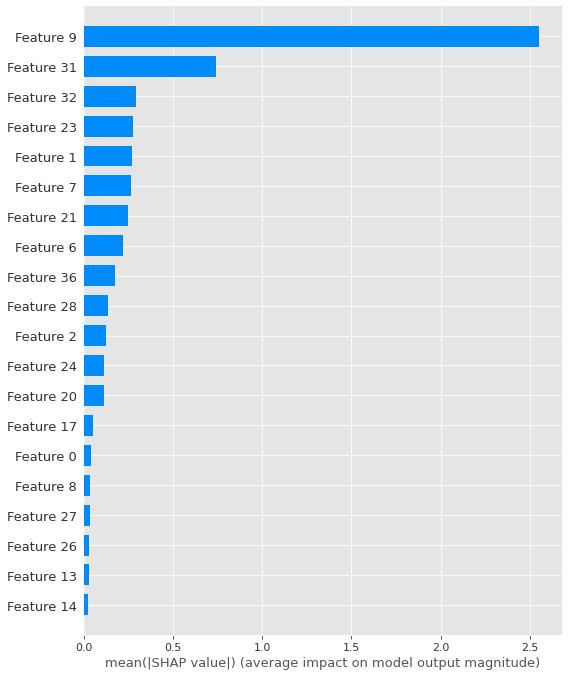

In [98]:
shap.summary_plot(shap_values_test, X_test, plot_type="bar")

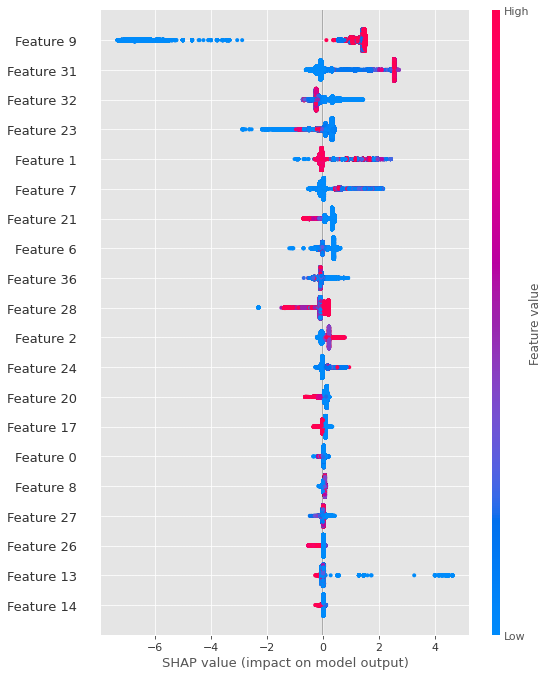

In [99]:
shap.summary_plot(shap_values_test, X_test)